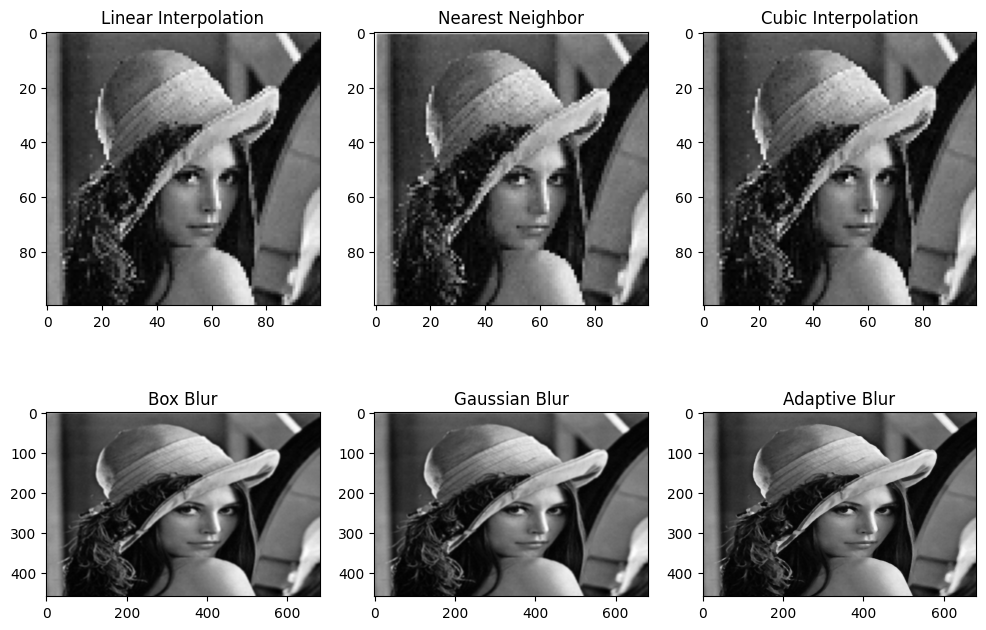

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split, KFold, cross_val_score
from sklearn.datasets import load_digits
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, roc_curve, auc
from sklearn.preprocessing import label_binarize
from sklearn.ensemble import RandomForestClassifier

image = cv2.imread('/content/Screenshot 2025-01-29 151118.png', cv2.IMREAD_GRAYSCALE)

resized_linear = cv2.resize(image, (100, 100), interpolation=cv2.INTER_LINEAR)
resized_nearest = cv2.resize(image, (100, 100), interpolation=cv2.INTER_NEAREST)
resized_cubic = cv2.resize(image, (100, 100), interpolation=cv2.INTER_CUBIC)

box_blur = cv2.blur(image, (5,5))
gaussian_blur = cv2.GaussianBlur(image, (5,5), 20)
adaptive_blur = cv2.medianBlur(image, 5)

fig, axes = plt.subplots(2, 3, figsize=(12, 8))
axes[0, 0].imshow(resized_linear, cmap='gray'); axes[0, 0].set_title('Linear Interpolation')
axes[0, 1].imshow(resized_nearest, cmap='gray'); axes[0, 1].set_title('Nearest Neighbor')
axes[0, 2].imshow(resized_cubic, cmap='gray'); axes[0, 2].set_title('Cubic Interpolation')
axes[1, 0].imshow(box_blur, cmap='gray'); axes[1, 0].set_title('Box Blur')
axes[1, 1].imshow(gaussian_blur, cmap='gray'); axes[1, 1].set_title('Gaussian Blur')
axes[1, 2].imshow(adaptive_blur, cmap='gray'); axes[1, 2].set_title('Adaptive Blur')
plt.show()



Model: SVM
Accuracy: 0.8750
Precision: 0.8752
Recall: 0.8757
F1 Score: 0.8731
Confusion Matrix:
[[33  0  0  0  0  0  0  0  0  0]
 [ 0 22  4  0  0  0  0  0  0  2]
 [ 0  1 30  1  0  0  0  0  1  0]
 [ 0  1  0 31  0  0  0  0  2  0]
 [ 0  3  0  0 42  0  0  1  0  0]
 [ 0  0  0  0  0 37  1  0  0  9]
 [ 1  0  0  0  0  0 34  0  0  0]
 [ 0  0  0  0  0  1  0 33  0  0]
 [ 0  6  0  0  0  1  0  0 22  1]
 [ 0  1  0  3  1  1  0  3  0 31]]
AUC: 0.9970

Model: Random Forest
Accuracy: 0.9722
Precision: 0.9740
Recall: 0.9727
F1 Score: 0.9732
Confusion Matrix:
[[32  0  0  0  1  0  0  0  0  0]
 [ 0 28  0  0  0  0  0  0  0  0]
 [ 0  0 33  0  0  0  0  0  0  0]
 [ 0  0  0 32  0  1  0  0  1  0]
 [ 0  0  0  0 46  0  0  0  0  0]
 [ 0  0  0  0  0 45  1  0  0  1]
 [ 0  0  0  0  0  1 34  0  0  0]
 [ 0  0  0  0  0  0  0 33  0  1]
 [ 0  1  0  0  0  0  0  0 29  0]
 [ 0  0  0  0  0  1  0  1  0 38]]
AUC: 0.9996



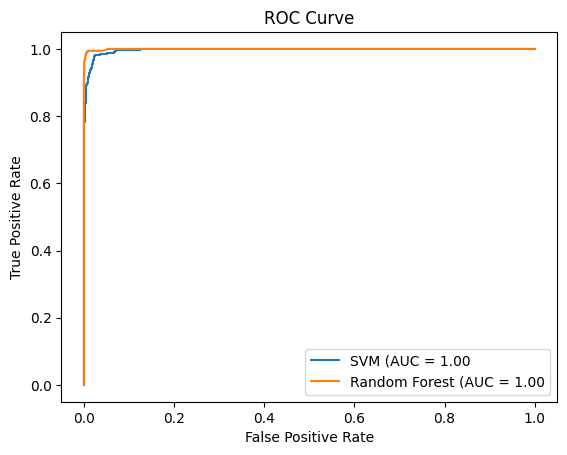

In [ ]:
# MNIST Dataset
digits = load_digits()
X, y = digits.data, digits.target

X = X / 255.0

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

models = {
    "SVM": SVC(kernel='linear', probability=True),
    "Random Forest": RandomForestClassifier(n_estimators=100, random_state=42)
}

kf = KFold(n_splits=5, shuffle=True, random_state=42)

for name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)

    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='macro')
    recall = recall_score(y_test, y_pred, average='macro')
    f1 = f1_score(y_test, y_pred, average='macro')
    conf_matrix = confusion_matrix(y_test, y_pred)

    y_test_bin = label_binarize(y_test, classes=np.arange(10))
    y_pred_prob = model.predict_proba(X_test)
    fpr, tpr, _ = roc_curve(y_test_bin.ravel(), y_pred_prob.ravel())
    roc_auc = auc(fpr, tpr)

    print(f"Model: {name}")
    print(f"Accuracy: {accuracy:.4f}")
    print(f"Precision: {precision:.4f}")
    print(f"Recall: {recall:.4f}")
    print(f"F1 Score: {f1:.4f}")
    print("Confusion Matrix:")
    print(conf_matrix)
    print(f"AUC: {roc_auc:.4f}\n")

    plt.plot(fpr, tpr, label=f'{name} (AUC = {roc_auc:.2f}')

plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate")
plt.title("ROC Curve")
plt.legend()
plt.show()